# Assimilation of TBs to correct TOPAZ5 forecasts
- Standalone analysis using the EnKF-C software
- Model data: TOPAZ5 outputs
- Observations: sea-ice concentration (SIT) and Tbs (19v, 19h, 37v, 37h) from AMSR2 

## Four data assimilation experiments are defined. Experiments are to be performed in this order:
1. exp_sic: synchronous assimilation of SIC
2. exp_tb: synchronous assimilation of Tbs
3. exp_sic_asyn: asynchronous assimilation of SIC
4. exp_tb_asyn: asynchronous assimilation of Tbs

## This notebook is composed of five steps:
1. Computation of DAL and 2D-plane coefficients
2. RTM Tbs simulation
3. Plotting of RTM Tbs
4. Preparation of background ensemble, observations and mask for EnKF
5. Run EnKF
6. Plotting

In [1]:
import importlib
from main_imports import cmd

### Configuration file (save you configuration file with a different name and copy it to the main config.py file)

In [2]:
config_filename = f'config_2021.py' # Name of you configuration file
cmd(f'cp {config_filename} config.py')
import config; importlib.reload(config)

cp config_2021.py config.py


<module 'config' from '/home/marinadm/rtm_da/config.py'>

### Model mask file to be used in the RTM simulations and DA analysis

In [3]:
cmd(f'rm {config.exps_dir}/conf/mask_topaz5.nc')
cmd(f'ln -s {config.exps_dir}/conf/{config.date[0:4]}/topaz5_grid_{config.date[0:4]}.nc  {config.exps_dir}/conf/mask_topaz5.nc')

rm /lustre/storeB/project/fou/fd/project/acciberg/marina/enkf_exps//conf/mask_topaz5.nc
ln -s /lustre/storeB/project/fou/fd/project/acciberg/marina/enkf_exps//conf/2021/topaz5_grid_2021.nc  /lustre/storeB/project/fou/fd/project/acciberg/marina/enkf_exps//conf/mask_topaz5.nc


0

### Check the DA experiment to be performed

In [4]:
print("DA experiment: ", config.assim)

DA experiment:  exp_tb


In [5]:
steps = input("run all steps: write all. Run only RTM, write rtm. Run only DA, write da.")
print(steps)
#steps = 'rtm'

run all steps: write all. Run only RTM, write rtm. Run only DA, write da. all


all


## Define the steps to perform

In [6]:
if steps == 'all' : 
    ''' All steps '''
    compute_coeffs = run_rtm = make_plots_rtm = prepare_enkf = run_enkf = make_plots_da = True
    
elif steps == 'rtm' :
    ''' RTM steps '''
    compute_coeffs = run_rtm = make_plots_rtm = True
    
elif steps == 'da' :
    ''' EnKF steps '''
    prepare_enkf = run_enkf = make_plots_da = True
    
else : 
    ''' RTM steps '''
    compute_coeffs = False 
    run_rtm = False
    make_plots_rtm = False
    ''' EnKF steps '''
    prepare_enkf = False
    run_enkf = False
    make_plots_da = True 

In [7]:
print('compute_coeffs', compute_coeffs)
print('run_rtm', run_rtm)
print('make_plots_rtm', make_plots_rtm)
print('prepare_enkf', prepare_enkf)
print('run_enkf', run_enkf)
print('make_plots_da', make_plots_da) 

compute_coeffs True
run_rtm True
make_plots_rtm True
prepare_enkf True
run_enkf True
make_plots_da True


## 1. Computation of DAL and 2D-plane coefficients

In [8]:
if compute_coeffs :
    
    from rtm_dal.main_fcts_rtm_tbs import *

    print('Computation of DAL (Distance Along the Line) from TPD and TPA files...')
    dal_norm, _, list_tpd_files = compute_dal() 

    print('\nComputation of 2D-plane coefficients. This 2D-plane is defined by the relation between Emissivity, DAL and T2m...')
    compute_coeffs(dal_norm, list_tpd_files)  
    
    print('...computation finished.')

Computation of DAL (Distance Along the Line) from TPD and TPA files...

Computation of 2D-plane coefficients. This 2D-plane is defined by the relation between Emissivity, DAL and T2m...
...computation finished.


## 2. RTM Tb simulation

In [9]:
if run_rtm :
    
    from rtm_dal.main_fcts_rtm_tbs import *
    
    if 'exp_tb_asyn' in config.assim :
        
        print('\nComputation of RTM Tbs (swaths)...')
        import warnings
        warnings.filterwarnings("ignore") # Ignore warning related to division in eq35
        res = run_rtm_swaths(version = 1)
        warnings.resetwarnings()        

        print('\nCreate directory where RTM Tbs will be saved')
        cmd('mkdir -p ' + f"{config.rtm_tbs_dir}"); cmd('mkdir -p ' + f"{config.rtm_tbs_dir}/passes/")

        print('\nCreate netCDF files containing RTM Tbs and saved them in the previously defined directory')
        save_rtm_tbs(res[0], f"{config.rtm_tbs_dir}/passes/", swaths = True)
        
    elif 'exp_sic' in config.assim :
        
        print('\nComputation of RTM Tbs (daily means)')
        import warnings
        warnings.filterwarnings("ignore") # Ignore warning related to division in eq35
        res = run_rtm(version = 1) 
        warnings.resetwarnings()        

        print('\nCreate directory where RTM Tbs will be saved')
        cmd('mkdir -p ' + f"{config.rtm_tbs_dir}"); cmd('mkdir -p ' + f"{config.rtm_tbs_dir}/means/")

        print('\nCreate netCDF files containing RTM Tbs and saved them in the previously defined directory')
        save_rtm_tbs(res[0], f"{config.rtm_tbs_dir}/means/")
    
    print('...RTM simulation finished.')

...RTM simulation finished.


## 3. Plotting from RTM Tb simulation (comparison to AMSR2 Tbs)

mem001
/lustre/storeB/project/fou/fd/project/acciberg/marina/topaz_tbs/20211201//topaz_tb_20211201_mem001.nc
mem002
/lustre/storeB/project/fou/fd/project/acciberg/marina/topaz_tbs/20211201//topaz_tb_20211201_mem002.nc
mem003
/lustre/storeB/project/fou/fd/project/acciberg/marina/topaz_tbs/20211201//topaz_tb_20211201_mem003.nc
mem004
/lustre/storeB/project/fou/fd/project/acciberg/marina/topaz_tbs/20211201//topaz_tb_20211201_mem004.nc
mem005
/lustre/storeB/project/fou/fd/project/acciberg/marina/topaz_tbs/20211201//topaz_tb_20211201_mem005.nc
mem006
/lustre/storeB/project/fou/fd/project/acciberg/marina/topaz_tbs/20211201//topaz_tb_20211201_mem006.nc
mem007
/lustre/storeB/project/fou/fd/project/acciberg/marina/topaz_tbs/20211201//topaz_tb_20211201_mem007.nc
mem008
/lustre/storeB/project/fou/fd/project/acciberg/marina/topaz_tbs/20211201//topaz_tb_20211201_mem008.nc
mem009
/lustre/storeB/project/fou/fd/project/acciberg/marina/topaz_tbs/20211201//topaz_tb_20211201_mem009.nc
mem010
/lustre/stor

/home/marinadm/rtm_da/plotting_codes/plotting_rtm.py:45: RuntimeWarning: Mean of empty slice
  mean = np.ma.masked_array(np.nanmean(list(tb_model_ens.values()), axis = 0), mask = new_mask)
/home/marinadm/rtm_da/plotting_codes/plotting_rtm.py:46: RuntimeWarning: Mean of empty slice
  diff = np.nanmean(list(tb_model_ens.values()), axis = 0) - tb_sat


mem001
/lustre/storeB/project/fou/fd/project/acciberg/marina/topaz_tbs/20211201//topaz_tb_20211201_mem001.nc
mem002
/lustre/storeB/project/fou/fd/project/acciberg/marina/topaz_tbs/20211201//topaz_tb_20211201_mem002.nc
mem003
/lustre/storeB/project/fou/fd/project/acciberg/marina/topaz_tbs/20211201//topaz_tb_20211201_mem003.nc
mem004
/lustre/storeB/project/fou/fd/project/acciberg/marina/topaz_tbs/20211201//topaz_tb_20211201_mem004.nc
mem005
/lustre/storeB/project/fou/fd/project/acciberg/marina/topaz_tbs/20211201//topaz_tb_20211201_mem005.nc
mem006
/lustre/storeB/project/fou/fd/project/acciberg/marina/topaz_tbs/20211201//topaz_tb_20211201_mem006.nc
mem007
/lustre/storeB/project/fou/fd/project/acciberg/marina/topaz_tbs/20211201//topaz_tb_20211201_mem007.nc
mem008
/lustre/storeB/project/fou/fd/project/acciberg/marina/topaz_tbs/20211201//topaz_tb_20211201_mem008.nc
mem009
/lustre/storeB/project/fou/fd/project/acciberg/marina/topaz_tbs/20211201//topaz_tb_20211201_mem009.nc
mem010
/lustre/stor

/home/marinadm/rtm_da/plotting_codes/plotting_rtm.py:45: RuntimeWarning: Mean of empty slice
  mean = np.ma.masked_array(np.nanmean(list(tb_model_ens.values()), axis = 0), mask = new_mask)
/home/marinadm/rtm_da/plotting_codes/plotting_rtm.py:46: RuntimeWarning: Mean of empty slice
  diff = np.nanmean(list(tb_model_ens.values()), axis = 0) - tb_sat


mem001
/lustre/storeB/project/fou/fd/project/acciberg/marina/topaz_tbs/20211201//topaz_tb_20211201_mem001.nc
mem002
/lustre/storeB/project/fou/fd/project/acciberg/marina/topaz_tbs/20211201//topaz_tb_20211201_mem002.nc
mem003
/lustre/storeB/project/fou/fd/project/acciberg/marina/topaz_tbs/20211201//topaz_tb_20211201_mem003.nc
mem004
/lustre/storeB/project/fou/fd/project/acciberg/marina/topaz_tbs/20211201//topaz_tb_20211201_mem004.nc
mem005
/lustre/storeB/project/fou/fd/project/acciberg/marina/topaz_tbs/20211201//topaz_tb_20211201_mem005.nc
mem006
/lustre/storeB/project/fou/fd/project/acciberg/marina/topaz_tbs/20211201//topaz_tb_20211201_mem006.nc
mem007
/lustre/storeB/project/fou/fd/project/acciberg/marina/topaz_tbs/20211201//topaz_tb_20211201_mem007.nc
mem008
/lustre/storeB/project/fou/fd/project/acciberg/marina/topaz_tbs/20211201//topaz_tb_20211201_mem008.nc
mem009
/lustre/storeB/project/fou/fd/project/acciberg/marina/topaz_tbs/20211201//topaz_tb_20211201_mem009.nc
mem010
/lustre/stor

/home/marinadm/rtm_da/plotting_codes/plotting_rtm.py:45: RuntimeWarning: Mean of empty slice
  mean = np.ma.masked_array(np.nanmean(list(tb_model_ens.values()), axis = 0), mask = new_mask)
/home/marinadm/rtm_da/plotting_codes/plotting_rtm.py:46: RuntimeWarning: Mean of empty slice
  diff = np.nanmean(list(tb_model_ens.values()), axis = 0) - tb_sat


mem001
/lustre/storeB/project/fou/fd/project/acciberg/marina/topaz_tbs/20211201//topaz_tb_20211201_mem001.nc
mem002
/lustre/storeB/project/fou/fd/project/acciberg/marina/topaz_tbs/20211201//topaz_tb_20211201_mem002.nc
mem003
/lustre/storeB/project/fou/fd/project/acciberg/marina/topaz_tbs/20211201//topaz_tb_20211201_mem003.nc
mem004
/lustre/storeB/project/fou/fd/project/acciberg/marina/topaz_tbs/20211201//topaz_tb_20211201_mem004.nc
mem005
/lustre/storeB/project/fou/fd/project/acciberg/marina/topaz_tbs/20211201//topaz_tb_20211201_mem005.nc
mem006
/lustre/storeB/project/fou/fd/project/acciberg/marina/topaz_tbs/20211201//topaz_tb_20211201_mem006.nc
mem007
/lustre/storeB/project/fou/fd/project/acciberg/marina/topaz_tbs/20211201//topaz_tb_20211201_mem007.nc
mem008
/lustre/storeB/project/fou/fd/project/acciberg/marina/topaz_tbs/20211201//topaz_tb_20211201_mem008.nc
mem009
/lustre/storeB/project/fou/fd/project/acciberg/marina/topaz_tbs/20211201//topaz_tb_20211201_mem009.nc
mem010
/lustre/stor

/home/marinadm/rtm_da/plotting_codes/plotting_rtm.py:45: RuntimeWarning: Mean of empty slice
  mean = np.ma.masked_array(np.nanmean(list(tb_model_ens.values()), axis = 0), mask = new_mask)
/home/marinadm/rtm_da/plotting_codes/plotting_rtm.py:46: RuntimeWarning: Mean of empty slice
  diff = np.nanmean(list(tb_model_ens.values()), axis = 0) - tb_sat


mem001
/lustre/storeB/project/fou/fd/project/acciberg/marina/topaz_tbs/20211201//topaz_tb_20211201_mem001.nc
mem002
/lustre/storeB/project/fou/fd/project/acciberg/marina/topaz_tbs/20211201//topaz_tb_20211201_mem002.nc
mem003
/lustre/storeB/project/fou/fd/project/acciberg/marina/topaz_tbs/20211201//topaz_tb_20211201_mem003.nc
mem004
/lustre/storeB/project/fou/fd/project/acciberg/marina/topaz_tbs/20211201//topaz_tb_20211201_mem004.nc
mem005
/lustre/storeB/project/fou/fd/project/acciberg/marina/topaz_tbs/20211201//topaz_tb_20211201_mem005.nc
mem006
/lustre/storeB/project/fou/fd/project/acciberg/marina/topaz_tbs/20211201//topaz_tb_20211201_mem006.nc
mem007
/lustre/storeB/project/fou/fd/project/acciberg/marina/topaz_tbs/20211201//topaz_tb_20211201_mem007.nc
mem008
/lustre/storeB/project/fou/fd/project/acciberg/marina/topaz_tbs/20211201//topaz_tb_20211201_mem008.nc
mem009
/lustre/storeB/project/fou/fd/project/acciberg/marina/topaz_tbs/20211201//topaz_tb_20211201_mem009.nc
mem010
/lustre/stor

/home/marinadm/rtm_da/plotting_codes/plotting_rtm.py:82: RuntimeWarning: Mean of empty slice
  rtm_mean = np.ma.masked_array(np.nanmean(list(read_model_matrix_tb(ich).values()), axis = 0), mask = read_mask())


mem001
/lustre/storeB/project/fou/fd/project/acciberg/marina/topaz_tbs/20211201//topaz_tb_20211201_mem001.nc
mem002
/lustre/storeB/project/fou/fd/project/acciberg/marina/topaz_tbs/20211201//topaz_tb_20211201_mem002.nc
mem003
/lustre/storeB/project/fou/fd/project/acciberg/marina/topaz_tbs/20211201//topaz_tb_20211201_mem003.nc
mem004
/lustre/storeB/project/fou/fd/project/acciberg/marina/topaz_tbs/20211201//topaz_tb_20211201_mem004.nc
mem005
/lustre/storeB/project/fou/fd/project/acciberg/marina/topaz_tbs/20211201//topaz_tb_20211201_mem005.nc
mem006
/lustre/storeB/project/fou/fd/project/acciberg/marina/topaz_tbs/20211201//topaz_tb_20211201_mem006.nc
mem007
/lustre/storeB/project/fou/fd/project/acciberg/marina/topaz_tbs/20211201//topaz_tb_20211201_mem007.nc
mem008
/lustre/storeB/project/fou/fd/project/acciberg/marina/topaz_tbs/20211201//topaz_tb_20211201_mem008.nc
mem009
/lustre/storeB/project/fou/fd/project/acciberg/marina/topaz_tbs/20211201//topaz_tb_20211201_mem009.nc
mem010
/lustre/stor

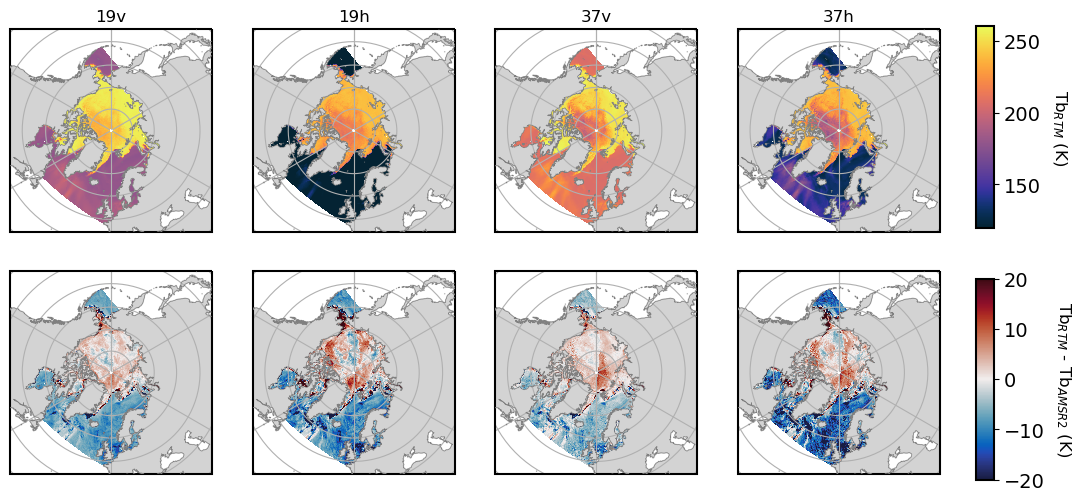

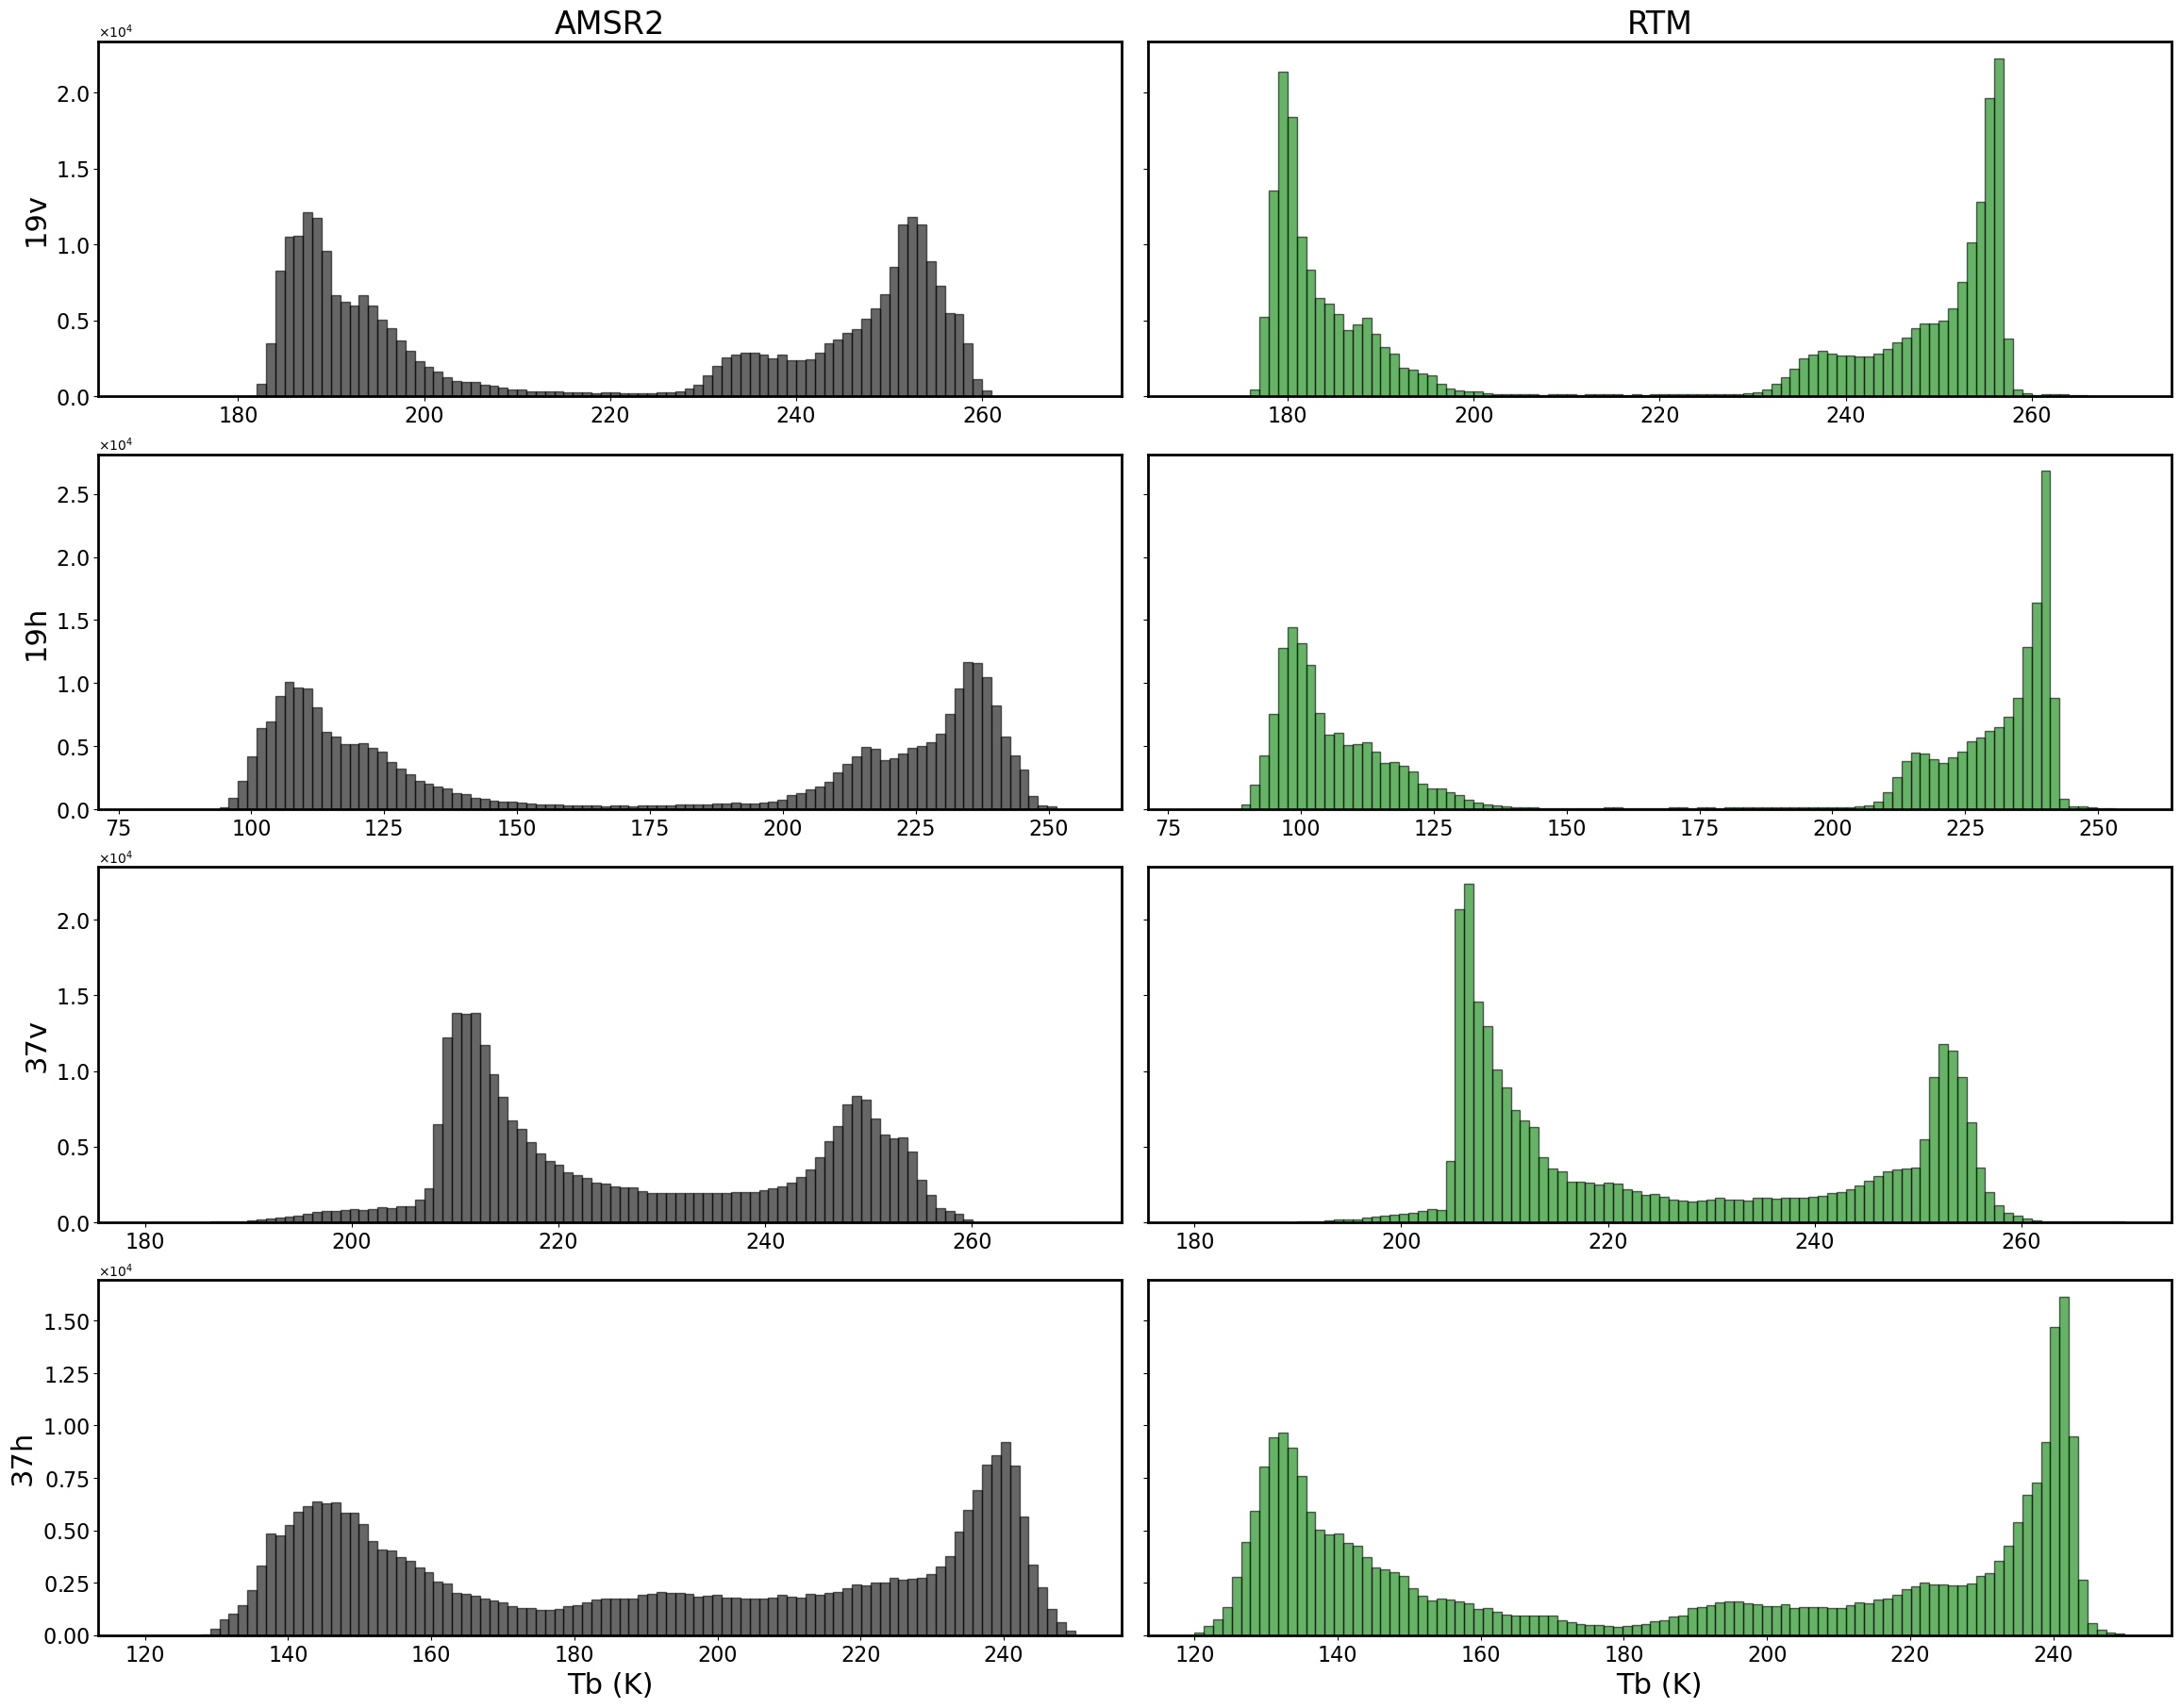

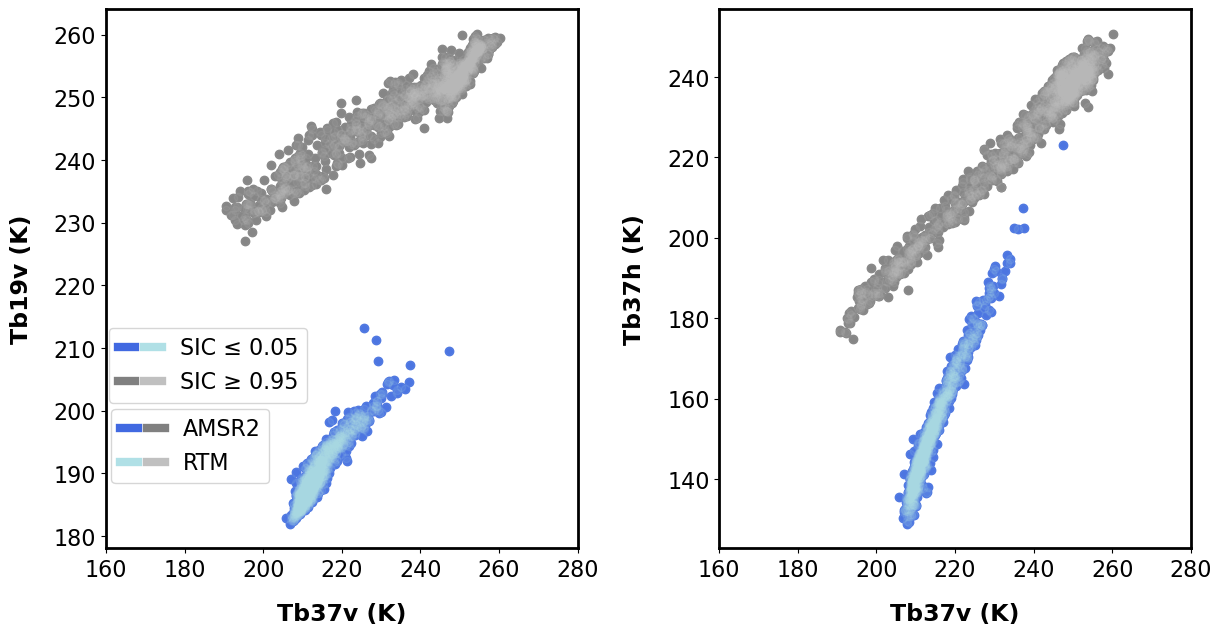

In [10]:
'''
 Plot scripts might need to be adapted depending on your data format and dimensions
'''

if make_plots_rtm :
    
    # Create a RTM Tbs map and difference to AMSR2 (two rows)
    from plotting_codes import plotting_rtm
    #from plotting_codes.plotting_rtm import *
    importlib.reload(plotting_rtm)
    
    plot_rtm = plotting_rtm.subplots_rtm_tbs #metrics
    plot_rtm() 
    
    plot_hist = plotting_rtm.plot_histograms
    plot_hist()
    
    plot_diags = plotting_rtm.plot_diagrams
    plot_diags()    
        
    print('...plotting finished.')

## 4. Preparation of background ensemble, observations and mask for EnKF

In [11]:
if prepare_enkf :
    
    print('Preparation of background ensemble, observations and mask for EnKF-C')
    cmd('mkdir -p ' + config.storage_dir)
    cmd('mkdir -p ' + config.storage_dir + 'ensb');
    cmd('rm ' + config.storage_dir + 'ensb/*nc')

    if config.assim == 'exp_sic' :
        
        from steps_da import prepare_ens; importlib.reload(prepare_ens); prep_ens = prepare_ens.prep_ensemble        
        from steps_da import prepare_obs; importlib.reload(prepare_obs); prep_topaz = prepare_obs.prep_topaz        
        from steps_da import model_mask; importlib.reload(model_mask); prep_mask = model_mask.generate_mask
        
        print('Ensemble preparation...'); prep_ens()        
        print('Prepare observations (means)...'); prep_topaz()        
        print('Generation of TOPAZ mask...'); prep_mask() 

    elif config.assim == 'exp_tb' :      
        
        storage_dir_tbs = f"{config.exps_dir}/exps_2021/exp_sic/{config.date}/"
        cmd('ln -s ' + storage_dir_tbs + 'ensb/* ' + config.storage_dir + 'ensb/') # Link to background ensemble
        
    elif config.assim == 'exp_sic_asyn' :
        
        storage_dir_asyn = f"{config.exps_dir}/exps_2021/exp_sic/{config.date}/"
        cmd('ln -s ' + storage_dir_asyn + 'ensb/* ' + config.storage_dir + 'ensb/') # Link to background ensemble
        
        from steps_da import prepare_ens; importlib.reload(prepare_ens); prep_ens = prepare_ens.prep_ensemble_asyn
        from steps_da import prepare_obs; importlib.reload(prepare_obs); prep_topaz = prepare_obs.prep_topaz_passes
        from steps_da import change_date; importlib.reload(change_date); update = change_date.update_enkf_prm
        
        print('Ensemble preparation for ASYN experiment...'); prep_ens()        
        print('Prepare observations (passes)...'); prep_topaz()
        print('Update the EnKF date...'); update()
        
    elif config.assim == 'exp_tb_asyn' : 
        
        storage_dir_asyn = f"{config.exps_dir}/exps_2021/exp_sic/{config.date}/"
        cmd('ln -s ' + storage_dir_asyn + 'ensb/* ' + config.storage_dir + 'ensb/') # Link to background ensemble
        
        from steps_da import prepare_ens; importlib.reload(prepare_ens); prep_ens = prepare_ens.prep_ensemble_asyn
        
        print('Ensemble preparation for ASYN experiment...'); prep_ens()   

    print('...preparation of model and observation data finished.')

Preparation of background ensemble, observations and mask for EnKF-C
mkdir -p /lustre/storeB/project/fou/fd/project/acciberg/marina/enkf_exps//exps_2021/exp_tb/20211201/
mkdir -p /lustre/storeB/project/fou/fd/project/acciberg/marina/enkf_exps//exps_2021/exp_tb/20211201/ensb
rm /lustre/storeB/project/fou/fd/project/acciberg/marina/enkf_exps//exps_2021/exp_tb/20211201/ensb/*nc
ln -s /lustre/storeB/project/fou/fd/project/acciberg/marina/enkf_exps//exps_2021/exp_sic/20211201/ensb/* /lustre/storeB/project/fou/fd/project/acciberg/marina/enkf_exps//exps_2021/exp_tb/20211201/ensb/
...preparation of model and observation data finished.


## 5. Run EnKF

In [12]:
if run_enkf :
    
    cmd('module use /modules/MET/rhel8/user-modules/')
    cmd('module load enkfc/2.9.9') 

    print('Running EnKF-C...')
    from steps_da.run_da import run_enkf
    run_enkf()
    
    print('...run finished.')

module use /modules/MET/rhel8/user-modules/
module load enkfc/2.9.9
Loading enkfc/2.9.9
  Loading requirement: fou-modules/hdf5/1.13.1
    /modules/MET/rhel8/user-modules/fou-kl/hdf5/1.13.1 fou-modules/netcdf/4.9.0
    openmpi/4.1.4-gcc
Running EnKF-C...
rm /lustre/storeB/users/marinadm/enkf_run/acciberg/exp_tb/ensemble_100/*
rm /lustre/storeB/users/marinadm/enkf_run/acciberg/exp_tb/obs/*
rm /lustre/storeB/users/marinadm/enkf_run/acciberg/exp_tb/conf/mask_topaz_tbs.nc
make clean
cp  /lustre/storeB/users/marinadm/enkf_run/acciberg/2021_prm_files/exp_tb/*prm /lustre/storeB/users/marinadm/enkf_run/acciberg/exp_tb/
ln -s /lustre/storeB/project/fou/fd/project/acciberg/marina/enkf_exps/observations/means/amsr2_topaz_obs_20211201*.nc /lustre/storeB/users/marinadm/enkf_run/acciberg/exp_tb/obs/
ln -s /lustre/storeB/project/fou/fd/project/acciberg/marina/enkf_exps//exps_2021/exp_tb/20211201/ensb/* /lustre/storeB/users/marinadm/enkf_run/acciberg/exp_tb/ensemble_100/
ln -s /lustre/storeB/project/f

ln: failed to create symbolic link '/lustre/storeB/users/marinadm/enkf_run/acciberg/exp_tb/conf/mask_topaz5.nc': File exists


  running PREP for EnKF-C version 2.9.9:
    command = "./enkf_prep enkf.prm"
    dir = "/lustre/storeB/users/marinadm/enkf_run/acciberg/exp_tb"
  2024-12-17 09:58:06
  reading prep specs from "enkf.prm":
    MODE = EnKF
    SCHEME = DEnKF
    MODEL PRM = "model.prm"
    GRID PRM = "grid.prm"
    OBS TYPES PRM = "obstypes.prm"
    OBS PRM = "obs.prm"
    DATE = "12188 days since 1990-01-01"
    ENSEMBLE DIR = "ensemble_100"
    ENSEMBLE SIZE = 10
    RFACTOR BASE = 1.0
    INFLATION BASE = 1.2000
    INFLATION MODE = CAPPED, MAX RATIO = 1.00
    KFACTOR = 2.0
      LOCRAD  = 20
      LOCWEIGHT =  1
    STRIDE = 3
    FIELDBUFFERSIZE = 4
    REGION Global: x = [-180.0, 180.0], y = [-90.0, 90.0]
    NCFORMAT = NETCDF4
    NCCOMPRESSION = 0
    EnKF flags:
      enkf_exitaction  = [SEGFAULT]
      enkf_obstype     = [VALUE]
    enkf_prep compile flags:
      INTERNAL_QSORT_R = [-]
  reading observation specs from "obs.prm":
    PRODUCT = ALL
      READER = gridded_xy
      TYPE = Tbrightn

mkdir: cannot create directory ‘/lustre/storeB/project/fou/fd/project/acciberg/marina/enkf_exps//exps_2021/exp_tb/20211201/enkf_files’: File exists


cp /lustre/storeB/users/marinadm/enkf_run/acciberg/exp_tb/spread.nc /lustre/storeB/project/fou/fd/project/acciberg/marina/enkf_exps//exps_2021/exp_tb/20211201/enkf_files
cp /lustre/storeB/users/marinadm/enkf_run/acciberg/exp_tb/*prm /lustre/storeB/project/fou/fd/project/acciberg/marina/enkf_exps//exps_2021/exp_tb/20211201/enkf_files
cp /lustre/storeB/users/marinadm/enkf_run/acciberg/exp_tb/*out /lustre/storeB/project/fou/fd/project/acciberg/marina/enkf_exps//exps_2021/exp_tb/20211201/enkf_files
...run finished.


## 6. Plotting from DA results

Making figures for variable aice_d...
mem001
/lustre/storeB/project/fou/fd/project/acciberg/marina/enkf_exps//exps_2021/exp_tb/20211201//ensb/mem001_aice_d.nc
mem002
/lustre/storeB/project/fou/fd/project/acciberg/marina/enkf_exps//exps_2021/exp_tb/20211201//ensb/mem002_aice_d.nc
mem003
/lustre/storeB/project/fou/fd/project/acciberg/marina/enkf_exps//exps_2021/exp_tb/20211201//ensb/mem003_aice_d.nc
mem004
/lustre/storeB/project/fou/fd/project/acciberg/marina/enkf_exps//exps_2021/exp_tb/20211201//ensb/mem004_aice_d.nc
mem005
/lustre/storeB/project/fou/fd/project/acciberg/marina/enkf_exps//exps_2021/exp_tb/20211201//ensb/mem005_aice_d.nc
mem006
/lustre/storeB/project/fou/fd/project/acciberg/marina/enkf_exps//exps_2021/exp_tb/20211201//ensb/mem006_aice_d.nc
mem007
/lustre/storeB/project/fou/fd/project/acciberg/marina/enkf_exps//exps_2021/exp_tb/20211201//ensb/mem007_aice_d.nc
mem008
/lustre/storeB/project/fou/fd/project/acciberg/marina/enkf_exps//exps_2021/exp_tb/20211201//ensb/mem008_aice

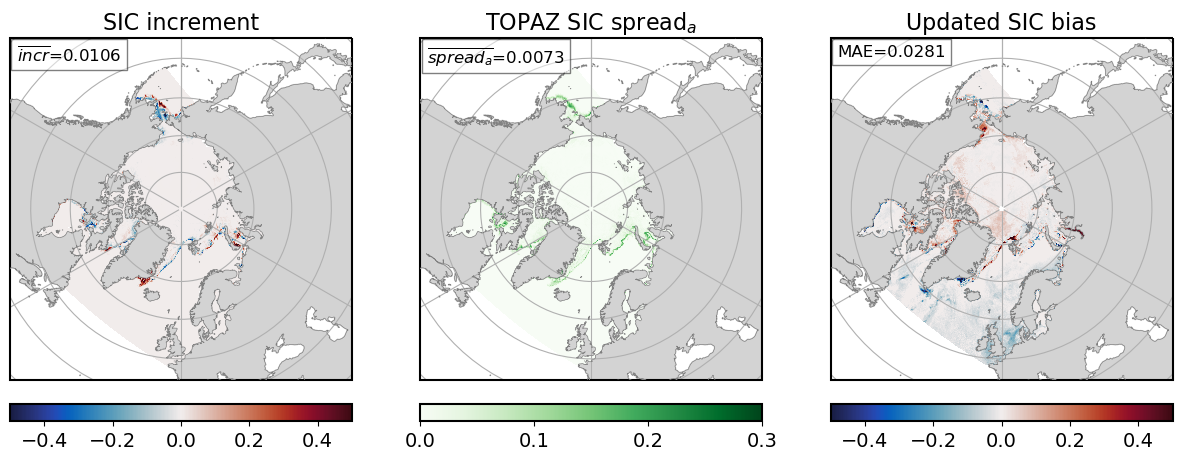

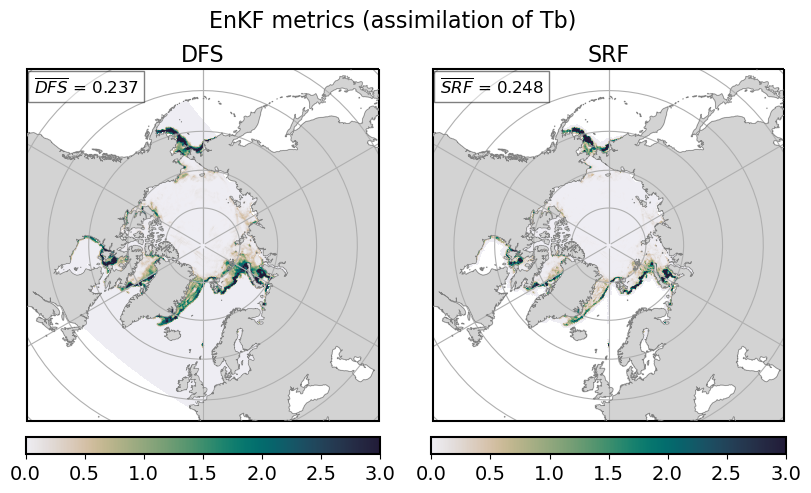

In [13]:
'''
 vari = 0 is aice
 vari = 1 is hi
 vari = 8 is iage
'''

vari = 0
metrics = True

if make_plots_da :
    
    print(f'Making figures for variable {config.varnames[vari]}...')
    
    from plotting_codes import plotting_da
    importlib.reload(plotting_da)
    from plotting_codes.plotting_da import *
    
    plot_metrics = plotting_da.plot_metrics
    
    if config.assim == 'exp_sic' :
        if vari == 0 :
            background_maps()
            background_maps(var = 'tb', var_tb = 0)
            analysis_maps(vari)
        elif vari > 0 : no_obs_maps(vari)

    else :
        if vari == 0 :
            analysis_maps(vari)
        elif vari > 0 : no_obs_maps(vari)
        
    if metrics : 
        
        print('\nPlotting EnKF metrics (DFS and SRF)...')
        plot_metrics()
        
    print('...plotting finished.')